# Project 3: MCMC and Statistical Mechanics

**PLEASE DO NOT CLEAR THE OUTPUT IN THIS NOTEBOOK. IT TAKES A VERY LONG TIME TO COMPUTE EVERYTHING.**

Let's start by importing the packages we need. 

`proj_3.py` contains the `weighted_die` method which is used to simulate multiple rolls for a weighted die. The class `Ising_2d` contains the methods and variables that will be helpful for simulating 2D Ising models. 

In [1]:
from proj_3 import weighted_die, Ising_2d
import numpy as np
import matplotlib.pyplot as plt
import math

## Weighted Die

Imagine that you are playing a game with your friend in which you roll a 6-sided die.  The way the game works is that every time the die lands on side 1 or side 2, you win one dollar, and every time the die lands on side 3, 4, 5, or 6, your friend wins one dollar (and you lose one dollar).  Because you really want to win the game at all costs, you decide to cheat and use a weighted die.  This means that the side is preferentially weighted so that sides 1 and 2 are each three times more likely to land face up than sides 3, 4, 5, and 6.  In other words, if $p_k$ denotes the probability that side $k$ will land face up, then

\begin{align}
    p_1 = p_2, \qquad p_3 = p_4 = p_5 = p_6 \qquad p_1 = 3 p_3.
\end{align}

The method `weighted_die` runs a Markov Chain Monte Carlo (MCMC) simulation to simulate multiple dice rolls. We can simulate a certain `num_rolls`, and keep track of the winnings. 

This problem is simple enough that we can determine the expected earnings analytically. 

For each roll of the die, there is a $\frac{3}{10}$ chance of rolling a 1 or a 2. And a $\frac{1}{10}$ of rolling a 3, 4, 5, or 6. We can double check that this is true, since 

$$\frac{3}{10}+\frac{3}{10}+\frac{1}{10}+\frac{1}{10}+\frac{1}{10}+\frac{1}{10} = 1$$

And 

$$p_1 = p_2 = 3 p_3 = 3 p_4 = 3 p_5 = 3 p_6$$

So, for each roll of the die, there is a $\frac{6}{10}$ chance of winning, and a $\frac{4}{10}$ chance of losing. (Hopefully the friend is smart enough to catch on to this early.)

Thus, for each round, we expect a 60\% chance of winning \\$1, and a 40\% chance of losing \\$1. Therefore, we expect to win an average of \\$0.20 each round. 

Our total expected winnings are $\$0.20 \times N$, where $N$ is the number of rounds played. 

Now that we know what kind of winnings to expect, let's simulate a bunch of rounds with our weighted die. 

Let's simulate 10,000 rounds. Then `winnings` is our total winnings after 10,000 rounds, and `results` contains the dice rolls and payout for each roll. 

In [ ]:
num_steps = 10000
winnings, results = weighted_die(num_steps)

print(f"After {num_steps} rounds, we expect to win ${num_steps*0.2:.2f}.")
print(f"We have won ${winnings:.2f}, with an average of ${winnings/num_steps:.4f} won per round.")

We can also plot our total winnings over time. We expect this to appear linear with a slope of \\$0.20.

In [ ]:
winnings_over_time = [0]
for roll in range(len(results)):
    winnings_over_time.append(results[roll][1] + winnings_over_time[-1])
    
roll_number = list(range(len(results) + 1))

plt.plot(roll_number, winnings_over_time)
plt.xlabel("Round Number")
plt.ylabel('Total Winnings')
plt.title('Total winnings over time for 10,000 rounds')
plt.show()

## 2D Ising Model

Our goal is to simulate a 2D Ising model on a square, periodic lattice of a specified side length (number of spins) `L` and at a given temperature `temp`.  We will perform multiple MCMC iteratons to simulate random spin flips based on the energy and temperature. 

I have chosen to represent the 2D Ising model using the `Ising_2d` class. In my opinion, this is easier and more organized to code than a massive function. This class contains all the necessary variables and methods we need to analyze the Ising model on a square lattice. 

### Plotting time series' of intensive quantities

As you run your MCMC simulation, you should find that the 
for larger system size, the Monte Carlo simulation needs to run longer steps, to reach equilibrium.  In order to monitor the convergence of values of observables during the simulation, it is helpful to plot their values as a function of time step.  In order to make the benchmarking a fair game, the "updating step per site" is defined as follows:

\begin{align}
    t=\frac{\text{Total updates}}{\text{numbers of sites}}
\end{align}

**What you need to do:**

- Choose system sizes $L = 16, 32$ and a temperature of your choosing not to close to the critical temperature, and run the simulation.  Plot $U$ and $M$ as functions of $t$, the update step per site defined above.  
- Roughly how long does it seem to take for the simulation to converge?  
- Does the time it takes seem to depend on the system size?

The main question to ask here is, "What does it mean for a Lattice to converge?"

Well, we are plotting Mean Internal Energy, $U$, and Magnetization, $M$, as functions of time. At each step in our MCMC, the energy and spin change slightly. 

We define $U = \frac{1}{N}\left \langle E \right \rangle$ and $M = \frac{1}{N}\left \langle S \right \rangle$. 

Where $N = L^2$ is the total number of spin sites, and $\langle E \rangle$ and $\langle S \rangle$ are the energy and spin expectation value respectively. 

So, over time our expectation values will converge to a constant, and thus so will $U$ and $M$. Therefore, we can say that our lattice has convereged when $U$ and $M$ become constant over time. 

Since we expect the total number of steps it takes for a lattice to converge to depend on the size of the lattice, we will "normalize" the plots of $U$ and $M$ over time by choosing a time step size dependant on the size of the lattice. 

In terms of the variables in our code, 

`time_step_size = num_steps / (L ** 2)`

Finally, we must ask how we should set our initial conditions. Our initial condition is our initial state of our lattice. 

It is helpful to know what to expect the lattice to look like after it has converged. Well, if our temperature $T$ is above the critial temperature $T_C \approx 2.2692$, then the spins will be randomly flipped up or down, with a net zero spin. If $T < T_C$, then we expect to see more of one spin state than another, until $T = 0$, when we expect all spin states to be aligned. 

In that case, let's begin our analysis by considering the case where our lattice starts off fully aligned (to spin +1), and set $T > T_C$. Let's set $L = 16$, and run the simulation for 100,000 steps. 

In [ ]:
# Define parameters
num_steps = 100000
L = 16
time_step_size = num_steps / (L ** 2)

# Set temperature to be 3. This is larger than the critical temperature. 
temp = 3

# Create our Ising model using L = 16, temp = 3.
model = Ising_2d(L, temp)
# model.set_rand_state()

# Let's run the MCMC for multiple steps, and calculate values for U and M for each step. 
vals = model.mcmcm(num_steps, calculate_vals = True, verbose = True)

# Now lets create our list of time steps to plot
time_steps = [time_step_size * i for i in range(1, num_steps + 1)]

plt.xlabel("Scaled Time")
plt.ylabel('Magnetization')
plt.title('Magnetization convergence over time')
plt.plot(time_steps, vals["M"])
plt.show()

plt.xlabel("Scaled Time")
plt.ylabel('Mean Internal Energy')
plt.title('Mean Internal Energy convergence over time')
plt.plot(time_steps, vals["U"])
plt.show()

When $L = 16$ and we simulate 100,000 steps, it appears that both Magnetization $M$ and Mean Internal Energy $U$ converge at around a time of $t = 1 \times 10^7$ to $t = 2 \times 10^7$. 

Now let's examine the case when $L = 32$. We will need a larger number of steps to see the convergence for this lattice size.

In [ ]:
# Define parameters
num_steps = 300000
L = 32
time_step_size = num_steps / (L ** 2)

# Set temperature to be 3. This is larger than the critical temperature. 
temp = 3

# Create our Ising model.
model = Ising_2d(L, temp)
# model.set_rand_state()

# Let's run the MCMC for multiple steps, and calculate values for U and M for each step. 
vals = model.mcmcm(num_steps, calculate_vals = True, verbose = True)

# Now lets create our list of time steps to plot
time_steps = [time_step_size * i for i in range(1, num_steps + 1)]

plt.xlabel("Scaled Time")
plt.ylabel('Magnetization')
plt.title('Magnetization convergence over time')
plt.plot(time_steps, vals["M"])
plt.show()

plt.xlabel("Scaled Time")
plt.ylabel('Mean Internal Energy')
plt.title('Mean Internal Energy convergence over time')
plt.plot(time_steps, vals["U"])
plt.show()

In this case, when $L = 32$ and we simulate 300,000 steps, it appears that both Magnetization $M$ and Mean Internal Energy $U$ converge at around a time of $t = 4 \times 10^7$. 

So as we can see, larger systems require more time to converge, even when we consider using a scaled time step. The curves for both systems appear as we would expect. They begin by rapidly approaching convergance, but then take a while to settle. Even then, some randomness can cause the simulation to take longer to converge than expected. 

We can even consider the case for $L = 64$ to truly verify that the time to converge differs among lattice sizes. 

In [ ]:
# Define parameters
num_steps = 700000
L = 64
time_step_size = num_steps / (L ** 2)

# Set temperature to be 3. This is larger than the critical temperature. 
temp = 3

# Create our Ising model.
model = Ising_2d(L, temp)
# model.set_rand_state()

# Let's run the MCMC for multiple steps, and calculate values for U and M for each step. 
vals = model.mcmcm(num_steps, calculate_vals = True, verbose = True)

# Now lets create our list of time steps to plot
time_steps = [time_step_size * i for i in range(1, num_steps + 1)]

plt.xlabel("Scaled Time")
plt.ylabel('Magnetization')
plt.title('Magnetization convergence over time')
plt.plot(time_steps, vals["M"])
plt.show()

plt.xlabel("Scaled Time")
plt.ylabel('Mean Internal Energy')
plt.title('Mean Internal Energy convergence over time')
plt.plot(time_steps, vals["U"])
plt.show()

In this case, when $L = 64$ and we simulate 700,000 steps, it appears that both Magnetization $M$ and Mean Internal Energy $U$ converge at around a time of $t = 8 \times 10^7$.

This confirms that larger systems require more time to converge, even when we use a scaled time step.

At this point, we should ask ourself the question, "How can we determine when the system converges?"

It would be helpful to program some way to decide when we have reached convergence. Due to the random nature of the simulation, no method would ever be perfect in a finite amount of time, but we can get close. 

Let's say we have reached convergance when the most recent 25% of all values vary by less than some tolerance. So for example, at some step n, we can examine the past 0.25n steps and see if the difference between the maximum and minimum value of $U$ are less than some constant, say 0.01. 

I have modified the `mcmc` method to stop after the convergence conditon is reached, or after `num_steps`. 

Let's see how our convergence checker works when $L = 32$.

In [ ]:
# Define parameters
num_steps = 300000
L = 32
time_step_size = num_steps / (L ** 2)

# Set temperature to be 3. This is larger than the critical temperature. 
temp = 3

# Create our Ising model.
model = Ising_2d(L, temp)
# model.set_rand_state()

# Let's run the MCMC for multiple steps, and calculate values for U and M for each step. 
vals = model.mcmcm(num_steps, calculate_vals = True, verbose = True, converge_stop = True)

# Now lets create our list of time steps to plot
time_steps = [time_step_size * i for i in range(1, len(vals["U"]) + 1)]

if len(vals['U']) < num_steps:
    print()
    print(f"System has converged in {len(vals['U']) * time_step_size:.2e} steps.")

plt.xlabel("Scaled Time")
plt.ylabel('Mean Internal Energy')
plt.title('Mean Internal Energy convergence over time')
plt.plot(time_steps, vals["U"])
plt.show()

We can see from this result that with the converence perameters chosen, it is stopping at about the same value that we determined by eye. This convergence stop will be useful to use for the part of the project. 

### Magnetization curves for different lattice sizes

Onsager's exact solution gives the following result for the magnetization as a function of temperature:

\begin{align}
M(T)& = \begin{cases}\Bigl[1 - \sinh^{-4}\bigl(2/T\bigr)\Bigr]^{1/8},& T<T_c\\
0,& T\geq T_c
\end{cases}
\end{align}

obtained in the thermodynamic limit $N\to\infty$. 

**What you need to do:**

- Consider system sizes $L = 8, 16, 32, 64$. 
- For each size, generate an $M(T)$ curve.  Plot these 4 curves, together with the exact curve, *in the same plot.* - We suggest you start the simulations at a high temperature above the critical point $T_c$  and slowly cool the ferromagnet by decreasing the temperature in small steps. After each update of $T$, perform a large number of iterations with the Metropolis-Hastings algorithm without calculating the ensemble averages. Once the system is close to thermal equilibrium start drawing the samples from the equilibrium distribution and calculate the averages along the way.

**Notes.**

- These are computationally expensive calculations.
- There are 4 curves for different system sizes.
- Each curve is made of many dots. (you decide the spacing of temperatures)
- Each dot is an averaged magnetization per site at a given temperature

Let's consider the temperature range $T \in [0, 4]$ for this part of the project. 

Let's increment temperature in steps of 0.01. Hopefully this will be small enough to draw a good plot, but large enough to not take forever to calculate. 

The plot for Onsager's exact solution is difficult to visualize. So let's plot it. 

In [ ]:
temps = np.arange(4, 0, -0.02)

def onsager(t):
    if t >= 2 / (math.log(1 + math.sqrt(2))):
        return 0
    else:
        return ((1 - (math.sinh(2 / t) ** (-4))) ** (1/8))
    
m_t = [onsager(t) for t in temps]

plt.plot(temps, m_t, color = "green", linestyle = "dashed")
plt.show()

What an interesting plot. 

Now we want to try and recreate this plot using our Ising model. 

First, we will choose a system size $L$. Then, starting at $T = 4$, I will run the mcmc algorithm until the value for $M$ converges, using our convergence method we created above. Once $M$ has converged, I will plot its current value for the current temperature. I will then decrease the temperature by our chosen step size, and run the mcmc algorithm again until $M$ converges. To save computation time, the state will not be reset after each temperature step. 

If our model matches the theory, we should have a scatter plot of $M(T)$ that matches the theoretical curve. 

In [ ]:
m_t_l = {}
m_t_l[8] = []
m_t_l[16] = []
m_t_l[32] = []
m_t_l[64] = []

system_sizes = [8, 16, 32, 64]

for L in system_sizes:
    print(f"Calculating L = {L}")
    # Define parameters
    num_steps = L * 10000

    init_temp = 4

    # Create our Ising model.
    model = Ising_2d(L, init_temp)

    for temp in temps:
        # Set temp
        model.set_temp(temp)

        # Run mcmc algorithm until convergence. 
        vals = model.mcmcm(num_steps, calculate_vals = True, converge_stop = True, converge_value = "M", converge_threshold = 0.01, verbose = False)

        # Save current value for M(temp) as the average of 25% most recent values
        segment = vals["M"][int((1-0.25)*len(vals["M"]))::]
        avg = sum(segment) / len(segment)
        m_t_l[L].append(avg)

plt.xlabel("Temperature")
plt.ylabel('Magnetization')
plt.title('Magnetization for different temperatures for L = 8')
plt.plot(temps, m_t, color = "green", linestyle = "dashed")
plt.scatter(temps, m_t_l[8], color = "red", marker = ".")
plt.show()

plt.xlabel("Temperature")
plt.ylabel('Magnetization')
plt.title('Magnetization for different temperatures for L = 16')
plt.plot(temps, m_t, color = "green", linestyle = "dashed")
plt.scatter(temps, m_t_l[16], color = "red", marker = ".")
plt.show()

plt.xlabel("Temperature")
plt.ylabel('Magnetization')
plt.title('Magnetization for different temperatures for L = 32')
plt.plot(temps, m_t, color = "green", linestyle = "dashed")
plt.scatter(temps, m_t_l[32], color = "red", marker = ".")
plt.show()

plt.xlabel("Temperature")
plt.ylabel('Magnetization')
plt.title('Magnetization for different temperatures for L = 64')
plt.plot(temps, m_t, color = "green", linestyle = "dashed")
plt.scatter(temps, m_t_l[64], color = "red", marker = ".")
plt.show()

This takes a very long time to calculate. 

There are a few interseting things to note. The first is that the Magnetization may either approach 1 or -1 as $T \rightarrow 0$. This depends on how the spins align as the system cools down, and it is random. So, in the event that one of these plots appears upside down, that is why. 

We see that the Onsager model appears to match our results pretty accurately for $T < T_C$. However, for $T > T_C$, the values for magnetization are all over the place. If we consider the average of all these values, we see that they do bounce around zero. However, they are not exactly zero as there always exists some fluctuations in our system due to randomness. 

### Typical spin configuration at different temperatures

Once the energy and magnetization have come to equilibrium in your simulation, you can look at the configuration of the system to see what a typical configuration of the system looks like in thermal equilibrium.  One way to do this is to make a plot of the whole array of spins with a black or white square representing spin up or spin down.

**What you need to do:**

- Choose your system size to be $L = 256$.  
- Make sure run your simulation enough time steps, until the system is in equilibrium.
- Plot three pictures of spin configuration, at temperature $T=1.8$, $T=2.3$, $T=4.0$.  Your pictures should display the grid of spins with either a black or white square at a given site depending on whether the site is in a spin up state or a spin down state.
- Comment on how the patterns differ at different temperatures and what they might physically tell us about how the system behaves at temperatures below, near, and above the critical temperature.

Let White represent spin up, Black represent spin down.

Let's choose a large system size of $L = 256$. We can then run the mcmc algorithm for a long time to settle into equilibrium for different temperatures. We can then draw the matrix as a 2D heatmap, with white representing spin up, and black representing spin down.

In [ ]:
# Set parameters
L = 256
num_steps = L * 10000
temp = 4.0

# Create our Ising model.
model = Ising_2d(L, temp)
model.set_rand_state()

# Let's run the MCMC for multiple steps.
model.mcmcm(num_steps, calculate_vals = False, verbose = True)

# And show the state
model.show_state()

At our chosen temp $T = 4.0$, we are larger than the critial temperature. For this temperature at equilibrium, we would expect our system to be random. The heatmap representation should look like static with no discernable areas of spin up or down. 

Looking at our result, we can see that this is indeed the case. 

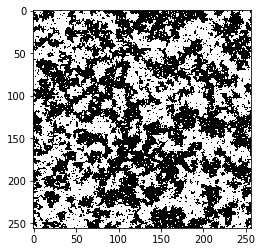

In [2]:
# Set parameters
L = 256
num_steps = L * 10000
temp = 2.3

# Create our Ising model.
model = Ising_2d(L, temp)
model.set_rand_state()

# Let's run the MCMC for multiple steps.
model.mcmcm(num_steps, calculate_vals = False, verbose = True)

# And show the state
model.show_state()

At our chosen temp $T = 2.3$, we are near the critial temperature. For this temperature at equilibrium, we would expect our system to have clusters of a similar spin. The heatmap representation should look there are splotches of grouped spin throughout the structure. 

Looking at our result, we can see that this is indeed the case. 

In [ ]:
# Set parameters
L = 256
num_steps = L * 10000
temp = 1.8

# Create our Ising model.
model = Ising_2d(L, temp)
model.set_rand_state()

# Let's run the MCMC for multiple steps.
model.mcmcm(num_steps, calculate_vals = False, verbose = True)

# And show the state
model.show_state()

At our chosen temp $T = 1.8$, we are less than the critial temperature. For this temperature at equilibrium, we would expect our system to be mostly uniform and have similar spin. The heatmap representation should appear to be dominated by one spin, with very small areas of opposite spin. 

Looking at our result, we can see that this is indeed the case. 